<a href="https://colab.research.google.com/github/BuczynskiRafal/ML/blob/main/unsupervised/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

# Wygenerowanie danych



In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8, 8), random_state=42)[0]
df = pd.DataFrame(data=data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=650, height=400, title='Algorytm K-średnich', template='plotly_dark')

# Algorytm K-średnich


In [7]:
from sklearn import cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)


KMeans(n_clusters=5)

In [8]:
# miara wcss
kmeans.inertia_

3858.9461388720724

In [11]:
# klasteryzacja - przypisanie do klastrów 
y_keans = kmeans.predict(data)

df['y_keans'] = y_keans
df.head()

,x1,x2,y_keans
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,1
4,3.322516,-0.676179,1


In [13]:
# wizualizacja danych 

px.scatter(data_frame=df, x='x1', y='x2', color='y_keans', width=650, height=400, title="Algorytm K-średnich - 5 klastrów", template='plotly_dark')

# WCSS - Within-Cluster-Sum-of-Squared

In [16]:
# lista wartosci dla konkretnych modelu z liczbą klastrów
wcss = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print(wcss)

[23414.04045869599, 7734.886635126095, 4282.137026938607, 3851.1336297332527, 3444.142470239303, 3091.053280774637, 2745.1799974566943, 2473.630511106371]


In [19]:
# Na podstawie wcss tworzę dataframe
wcss = pd.DataFrame(data=wcss, columns=['wcss'])
# reset indeksu aby można było dostać numer klastra
wcss = wcss.reset_index()
# zmiana nazwy kolimny index na clusters
wcss = wcss.rename(columns={'index': 'clusters'})
# dodaję 1 bo indeksy są od 0
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3851.133630
4,5,3444.142470


Metoda "łokcia" - Elbow Method


In [20]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

# Wizualizacja klastrów

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', 
           template='plotly_dark')

In [22]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers 

,c1,c2
0,-5.302413,-5.404200
1,-4.678306,6.633539
2,3.630348,1.808377


In [23]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, 
                 title='Algorytm K-średnich - 3 klastry', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers', 
                         marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}}, 
                         showlegend=False))
fig.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



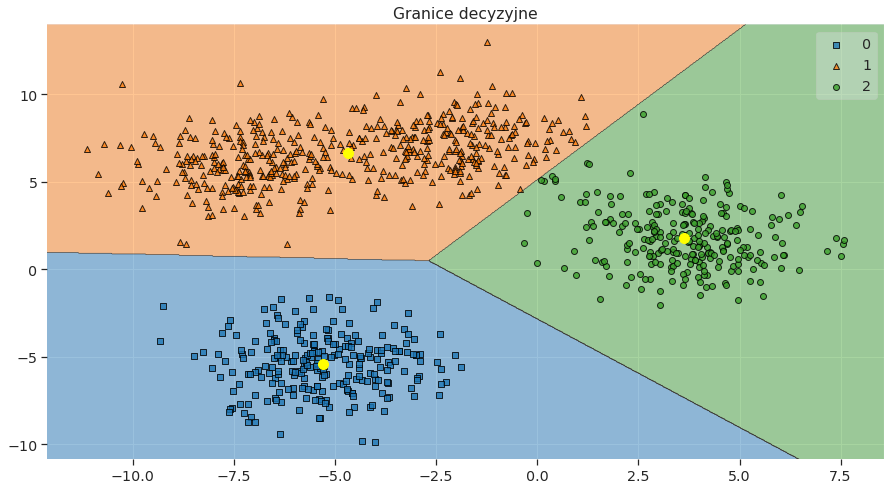

In [24]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()